
# Training a Decision Tree or a Random Forest on a classification problem, and compare the latter with using adaBoost

**Author: Pr Fabien MOUTARDE, Center for Robotics, MINES Paris, PSL Université**


## 1. Decision Trees with SciKit-Learn on a very simple dataset

**We will first work on very simple classic dataset: Iris, which is a classification problem corresponding to determination of iris flower sub-species based on a few geometric characteristics of the flower.**

**Please FIRST READ the [*Iris DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py).**
In this classification problem, there are 3 classes, with a total of 150 examples (each one with 4 input). Please **now execute code cell below to load and view the dataset**.


In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Load Iris classification dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Print all 150 examples
print("(Number_of_examples, example_size) = ", iris.data.shape, "\n")
for i in range(0, 150):
    print('Input = ', iris.data[i], ' , Label = ', iris.target[i])

(Number_of_examples, example_size) =  (150, 4) 

Input =  [5.1 3.5 1.4 0.2]  , Label =  0
Input =  [4.9 3.  1.4 0.2]  , Label =  0
Input =  [4.7 3.2 1.3 0.2]  , Label =  0
Input =  [4.6 3.1 1.5 0.2]  , Label =  0
Input =  [5.  3.6 1.4 0.2]  , Label =  0
Input =  [5.4 3.9 1.7 0.4]  , Label =  0
Input =  [4.6 3.4 1.4 0.3]  , Label =  0
Input =  [5.  3.4 1.5 0.2]  , Label =  0
Input =  [4.4 2.9 1.4 0.2]  , Label =  0
Input =  [4.9 3.1 1.5 0.1]  , Label =  0
Input =  [5.4 3.7 1.5 0.2]  , Label =  0
Input =  [4.8 3.4 1.6 0.2]  , Label =  0
Input =  [4.8 3.  1.4 0.1]  , Label =  0
Input =  [4.3 3.  1.1 0.1]  , Label =  0
Input =  [5.8 4.  1.2 0.2]  , Label =  0
Input =  [5.7 4.4 1.5 0.4]  , Label =  0
Input =  [5.4 3.9 1.3 0.4]  , Label =  0
Input =  [5.1 3.5 1.4 0.3]  , Label =  0
Input =  [5.7 3.8 1.7 0.3]  , Label =  0
Input =  [5.1 3.8 1.5 0.3]  , Label =  0
Input =  [5.4 3.4 1.7 0.2]  , Label =  0
Input =  [5.1 3.7 1.5 0.4]  , Label =  0
Input =  [4.6 3.6 1.  0.2]  , Label =  0
Input = 

**Building, training and evaluating a simple Decision Tree classifier**

The SciKit-learn class for Decision Tree classifiers is sklearn.tree.DecisionTreeClassifier.

**Please FIRST READ (and understand!) the [*DecisionTreeClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to understand all parameters of the contructor.**

**You can then begin by running the code block below, in which default set of parameter values has been used.** If graphical view works, look at the structure of the learnt decision tree.

**Then, check the influence of MAIN parameters for Decision Tree classifier, i.e.:**
 - **homegeneity criterion ('gini' or 'entropy')**
 - **max_depth**
 - **min_samples_split**
 
NB : Note that post-training *PRUNING* IS unfortunately *NOT* implemented in SciKit-Learn Decision-Trees :(

DecisionTreeClassifier(criterion='entropy', max_depth=5)
Acuracy (on test set) =  0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.87      0.93        15
           2       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


 CONFUSION MATRIX
[[14  0  0]
 [ 0 13  2]
 [ 0  0 16]]


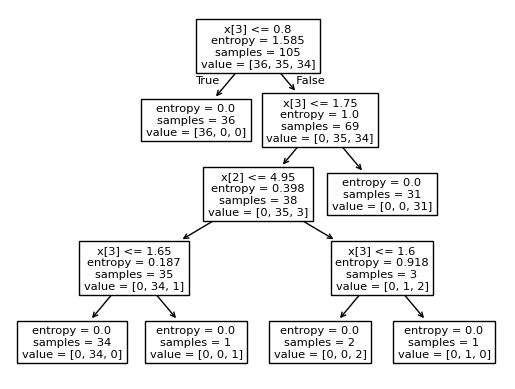

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split

# Split dataset into training and test part
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3)

# Learn a Decision Tree
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5,
                                  min_samples_split=2, min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0, max_features=None,
                                  random_state=None, max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
"""
criterion='entropy': 用于衡量分裂质量的函数。'entropy' 表示使用信息增益。
splitter='best': 用于选择分裂点的策略。'best' 表示选择最优分裂点。
max_depth=5: 决策树的最大深度。限制树的深度可以防止过拟合。
min_samples_split=2: 分裂一个内部节点所需的最小样本数。
min_samples_leaf=1: 叶子节点所需的最小样本数。
min_weight_fraction_leaf=0.0: 叶子节点所需的样本权重的最小加权分数。
max_features=None: 寻找最佳分裂时要考虑的特征数量。如果为 None，则考虑所有特征。
random_state=None: 控制随机数生成的种子。设置种子可以使结果可重复。
max_leaf_nodes=None: 叶子节点的最大数量。如果为 None，则不限制叶子节点的数量。
min_impurity_decrease=0.0: 节点分裂所需的最小不纯度减少量。
class_weight=None: 类别权重。可以用来处理类别不平衡问题。
ccp_alpha=0.0: 复杂度惩罚的参数，用于最小成本复杂度剪枝。"""
clf = clf.fit(X_train, y_train)

# Graphical view of learnt Decision Tree
tree.plot_tree(clf)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("\n CONFUSION MATRIX")
print(confusion_matrix(y_true, y_pred))

## 2. Decision Trees on a  MORE REALISTIC DATASET: HANDWRITTEN DIGITS

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**

In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). Please **now execute code cell below to load the dataset, visualize a typical example, and train a Desicion Tree on it**. 
The original code uses a **voluntarily SUBOPTIMAL set of learning hyperparameters values, which reaches ~66% test acuracy. Try to play with them in order to improve acuracy.**


Number_of-examples =  1797

 Plot of first example


<Figure size 640x480 with 0 Axes>

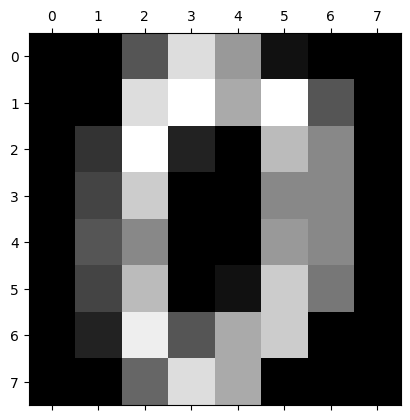

first answer: 0
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4)
Acuracy (on test set) =  0.6885428253615128
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        80
           1       0.45      0.68      0.54        88
           2       0.88      0.59      0.71        83
           3       0.90      0.73      0.80        95
           4       0.83      0.82      0.82        88
           5       0.42      0.84      0.56        81
           6       0.97      0.84      0.90       105
           7       0.95      0.65      0.78        95
           8       0.27      0.06      0.10        98
           9       0.65      0.79      0.72        86

    accuracy                           0.69       899
   macro avg       0.71      0.70      0.68       899
weighted avg       0.71      0.69      0.68       899


 CONFUSION MATRIX
[[77  0  0  0  2  1  0  0  0  0]
 [ 1 60  0  1  6  9  0  0  1 10]
 [ 2  3 49  3  0 2

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

print("\n Plot of first example")
plt.gray()
plt.matshow(digits.images[0])
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

# Split dataset into training and test part
X = data
y = digits.target
print(f'first answer: {y[0]}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Create and train a Decision Tree Classifier
# Tested later
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5,
                                  min_samples_split=4, min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0, max_features=None,
                                  random_state=None, max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
clf = clf.fit(X_train, y_train)


# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("\n CONFUSION MATRIX")
print(confusion_matrix(y_true, y_pred))

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((898, 64), (898,), (899, 64), (899,))

In [7]:
mat = confusion_matrix(y_true, y_pred)
pair, ans = (0, 0), 0
for i in range(10):
    for j in range(i + 1, 10):
        res = mat[i][j] + mat[j][i]
        if res > ans:
            ans = res
            pair = (i, j)
pair, ans

((2, 8), np.int64(26))

__Question: According to the confusion matrices, what digits are the most confused with each other?__

__Answer:__ 2 and 8

**Finally, find somewhat optimized values for the set of 3 main hyper-parameters for DecisionTree learning, by using GRID-SEARCH WITH CROSS-VALIDATION** (see cross-validation example from the Multi-Layer Perceptron notebook used in earlier practical session). __Put the code in the cell below:__

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.88        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



__Question: What best value have you managed to reach for TEST accuracy of your DecisionTree after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer:__ 0.84


In order to improve result, the most natural step is to combine SEVERAL decision trees, using the Ensemble model called Random Forest: see below

## 3. Building, training and evaluating a Random Forest classifier

The SciKit-learn class for Random Forest classifiers is sklearn.ensemble.RandomForestClassifier.

**Please FIRST READ (and understand!) the [*RandomForestClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to understand all parameters of the contructor.**

**Then you can begin by running the code block below, in which default set of parameter values has been used.** As you will see, a RandomForest (even rather small) can easily outperform single Decision Tree. 

**Then, check the influence of MAIN parameters for Random Forest classifier, i.e.:**
 - **n_estimators (number of trees in forest)**
 - **max_depth**
 - **max_features (max number of features used in each tree)**


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=8, criterion='gini', max_depth=10,
                             min_samples_split=2, min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0, max_features='sqrt',
                             max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True,
                             oob_score=False, n_jobs=1, random_state=None,
                             verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0)

clf = clf.fit(X_train, y_train)
print("n_estimators=", clf.n_estimators, " max_depth=", clf.max_depth,
      " max_features=", clf.max_features)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("\n CONFUSION MATRIX")
print(confusion_matrix(y_true, y_pred))

n_estimators= 8  max_depth= 10  max_features= sqrt
RandomForestClassifier(max_depth=10, n_estimators=8, n_jobs=1)
Acuracy (on test set) =  0.9299221357063404
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.90      0.89      0.90        95
           2       0.95      0.97      0.96        86
           3       0.94      0.91      0.93        92
           4       0.98      0.94      0.96        99
           5       0.93      0.92      0.93        91
           6       0.97      0.96      0.97        80
           7       0.90      0.96      0.93        85
           8       0.88      0.87      0.88        85
           9       0.86      0.89      0.88        95

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899


 CONFUSION MATRIX
[[89  0  0  0  0  0  0  0  2  0]
 [ 0 85  1  0  1  0  0  0  0  8

**Finally, find somewhat optimized values the set of 3 main hyper-parameters for RandomForest, by using CROSS-VALIDATION** (see cross-validation example from the Multi-Layer Perceptron notebook used in earlier practical session). __Put the code in the cell below:__

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.96      0.95      0.96       107
           2       0.97      0.99      0.98        89
           3       0.95      0.95      0.95        88
           4       0.94      0.96      0.95        89
           5       0.93      0.95      0.94        81
           6       0.98      0.94      0.96        89
           7       0.94      0.94      0.94        88
           8       0.92      0.88      0.90        93
           9       0.90      0.93      0.91        96

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



__Question: What best value have you managed to reach for TEST accuracy of your RandomForest after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer:__ 0.95

## 3. Building, training and evaluating an AdaBoost classifier

The SciKit-learn class for adaBoost is sklearn.ensemble.AdaBoostClassifier.

**Please FIRST READ (and understand!) the [*AdaBoostClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) to understand all parameters of the contructor.**

**Then begin by running the code block below, in which a default set of parameter values has been used.** 

**Then, check the influence of MAIN parameters for adaBoost classifier, i.e.:**
 - **estimator (ie type of Weak Classifier/Learner)** 
 - **n_estimators (number of boosting iterations, and therefore also number of weak classifiers)**
 - algorithm
 
**Finally, check which other types of classifiers can be used as Weak Classifier with the adaBoost implementation of SciKit-Learn.**
NB: in principle it is possible to use MLP classifiers as weak classifiers, but not with SciKit-learn implementation of MLPClassifier (because weighting of examples is not handled by its implementation).

Weak_learner: DecisionTreeClassifier(max_depth=6)
Weights of weak classifiers:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/home/julyfun/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


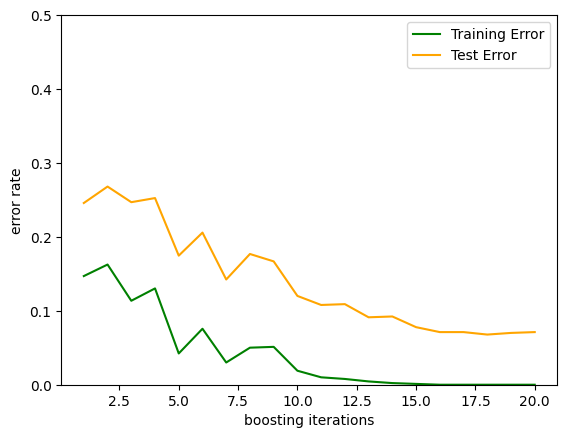

n_estimators= 20
Acuracy (on test set) =  0.92880978865406
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        91
           1       0.96      0.86      0.91        95
           2       0.98      0.97      0.97        86
           3       0.93      0.87      0.90        92
           4       0.98      0.94      0.96        99
           5       0.94      0.92      0.93        91
           6       0.99      0.95      0.97        80
           7       0.91      0.94      0.92        85
           8       0.79      0.96      0.87        85
           9       0.85      0.89      0.87        95

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899


 CONFUSION MATRIX
[[90  0  0  0  1  0  0  0  0  0]
 [ 0 82  1  1  0  0  0  0  4  7]
 [ 0  1 83  0  0  0  0  0  2  0]
 [ 0  0  1 80  0  2  0  0  6  3]
 [ 0  0  0  0 93  1  0  5  0  0

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
# Create and train an adaBoost classifier using SMALL Decision Trees as weak classifiers
weak_learner = tree.DecisionTreeClassifier(max_depth=6)
weak_learner2 = GaussianNB()
weak_learner3 = LogisticRegression()
clf = AdaBoostClassifier(weak_learner, n_estimators=20, learning_rate=1.0, algorithm='SAMME.R',
                         random_state=None)
clf = clf.fit(X_train, y_train)
print("Weak_learner:", clf.estimator)
print("Weights of weak classifiers: ", clf.estimator_weights_)

# Plot training curves (error = f(iterations))
n_iter = clf.n_estimators
ada_train_err = np.zeros((clf.n_estimators,))
for i, y_pred in enumerate(clf.staged_predict(X_train)):
    ada_train_err[i] = zero_one_loss(y_pred, y_train)
ada_test_err = np.zeros((clf.n_estimators,))
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    ada_test_err[i] = zero_one_loss(y_pred, y_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(n_iter) + 1, ada_train_err,
        label='Training Error',
        color='green')
ax.plot(np.arange(n_iter) + 1, ada_test_err,
        label='Test Error',
        color='orange')
ax.set_ylim((0.0, 0.5))
ax.set_xlabel('boosting iterations')
ax.set_ylabel('error rate')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()

# Evaluate acuracy on test data
print("n_estimators=", clf.n_estimators)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("\n CONFUSION MATRIX")
print(confusion_matrix(y_true, y_pred))

__Question:__ Looking at the training curves, you can see that **training error goes down to zero rather quickly, but that test_error still continues, after training error is zero, to diminish with increasing iterations**. __Is it normal, and why?__ (check the course!)

__Answer:__ It's normal, because each weak learner focuses on samples that the previous model (or in the previous epoch) failed to classify correctly, thereby adjusting the model to better fit the data distribution.

**Now, for the case of _DecisionTree_ weak classifiers, find somewhat optimized values of (max_depth, n_estimators) by using CROSS-VALIDATION.** __Put the code below:__

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
param_grid = {
    'estimator__max_depth': [3, 5, 10, 15, 20],
    'n_estimators': [50, 100, 200]
}
weak_learner = DecisionTreeClassifier()
ada = AdaBoostClassifier(weak_learner, learning_rate=1.0, algorithm='SAMME.R')
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)
print(classification_report(y_test, y_pred))

/home/julyfun/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/julyfun/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/julyfun/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/julyfun/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

Best parameters found:  {'estimator__max_depth': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      1.00      0.99        47
           6       1.00      0.97      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



__Question: What best value have you managed to reach for TEST accuracy of your AdaboostClassifier after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer:__ 0.99